BRITISH AIRWAYS ANALYSIS
---


In [4]:
#import packages

import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.5f}'.format 
np.set_printoptions(suppress=True, precision=5)

## <center><h2>Classification booking completion <h2><center>
---

In [29]:
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
pd.options.display.float_format = "{:.3f}".format

In [30]:
df.to_csv("E:/learn st new/BA_reviews2.csv")

In [30]:
#Import data
df = pd.read_csv(r'E:\learn st new\british airways theforage\customer_booking.csv', encoding ='latin1')
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.520,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.520,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.520,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.520,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.520,0


In [32]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [31]:
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']

In [33]:
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print()

sales_channel
Internet    44382
Mobile       5618
Name: sales_channel, dtype: int64

trip_type
RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64

flight_day
Mon    8102
Wed    7674
Tue    7673
Thu    7424
Fri    6761
Sun    6554
Sat    5812
Name: flight_day, dtype: int64

route
AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: route, Length: 799, dtype: int64

booking_origin
Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: booking_origin, Length: 104, dtype: int64



In [34]:
labelencoder = LabelEncoder()
df['sales_channel'] = labelencoder.fit_transform(df['sales_channel'])
df['trip_type'] =labelencoder.fit_transform(df['trip_type'])
df['flight_day'] =labelencoder.fit_transform(df['flight_day'])
df['route'] = labelencoder.fit_transform(df['route'])
df['booking_origin'] =labelencoder.fit_transform(df['booking_origin'])

#8 dữ liệu encoding

In [103]:
# pipeline featuring

cat_features = ['sales_channel','trip_type','flight_day','route','booking_origin']

num_features = ['num_passengers','purchase_lead','length_of_stay', 'flight_hour', 'flight_duration', 'wants_extra_baggage','wants_preferred_seat','wants_in_flight_meals']

features = num_features + cat_features
X = df.drop(["booking_complete"], axis=1)[features]
y = df["booking_complete"]

In [104]:
num_transformer = SimpleImputer(strategy="constant")

cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value =0)),
    ("onehot", OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[("num", num_transformer, num_features),
                                               ("cat", cat_transformer, cat_features)])

In [105]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=30)
print("Variables in Train Set : {} & Test Set : {}".format(len(x_train), len(x_test)))

Variables in Train Set : 37500 & Test Set : 12500


In [91]:
from imblearn.over_sampling import SMOTE

# Upsampling with SMOTE algorithm
smote = SMOTE(random_state= None ,k_neighbors= 5)

X_smote, y_smote = smote.fit_resample(X, y)

In [52]:
from sklearn.preprocessing import StandardScaler

In [106]:
#Modeling

base_models = [("DT_model", DecisionTreeClassifier(random_state=42)),
               ("RF_model", RandomForestClassifier(random_state=42,n_jobs=-1)),
               ("LR_model", LogisticRegression(random_state=42,n_jobs=-1)),
               ("XGB_model", XGBClassifier(random_state=42, n_jobs=-1))]


kfolds = 4 
split = KFold(n_splits= kfolds, shuffle=True, random_state=42)

# Preprocessing, fitting, making predictions and scoring for every model:
for name, model in base_models:
    
    model_steps = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])
    
    cv_results = cross_val_score(model_steps, 
                                 x_train, y_train, 
                                 cv=split,
                                 scoring="accuracy",
                                 n_jobs=-1,
                                 error_score='raise')

    min_score = round(min(cv_results), 4)
    max_score = round(max(cv_results), 4)
    mean_score = round(np.mean(cv_results), 4)
    std_dev = round(np.std(cv_results), 4)
    print(f"{name} cross validation accuarcy score: {mean_score} +/- {std_dev} (std) min: {min_score}, max: {max_score}, ")

DT_model cross validation accuarcy score: 0.7895 +/- 0.005 (std) min: 0.7819, max: 0.7959, 
RF_model cross validation accuarcy score: 0.8486 +/- 0.0045 (std) min: 0.8431, max: 0.8555, 
LR_model cross validation accuarcy score: 0.8498 +/- 0.0056 (std) min: 0.8413, max: 0.8557, 
XGB_model cross validation accuarcy score: 0.8497 +/- 0.0053 (std) min: 0.8416, max: 0.8564, 


Logistic Model có accuracy score lớn nhất nhưng chỉ nhỉnh hơn XGBoost 0.0001, sai số cao hơn 0.0003 và performance cao nhất thấp hơn của XGB nên lựa chọn XGBoost làm model của mô hình

In [119]:
#Chọn model tốt nhất

enh = XGBClassifier(n_estimators=160,
                               max_features=0.3,
                               min_samples_split=2,
                               n_jobs=-1,
                               random_state=0)

split = KFold(n_splits=kfolds, shuffle=True, random_state=42)
model_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', enh)])
cv_results1 = cross_val_score(model_pipe, 
                                 x_test, y_test, 
                                 cv=split,
                                 scoring="accuracy",
                                 n_jobs=-1)
# output:
print("Enhanced XGB model cross validation accuarcy score: {}%".format(100*round(np.mean(cv_results1),3)))

Enhanced XGB model cross validation accuarcy score: 84.5%


[13:10:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_split" } are not used.



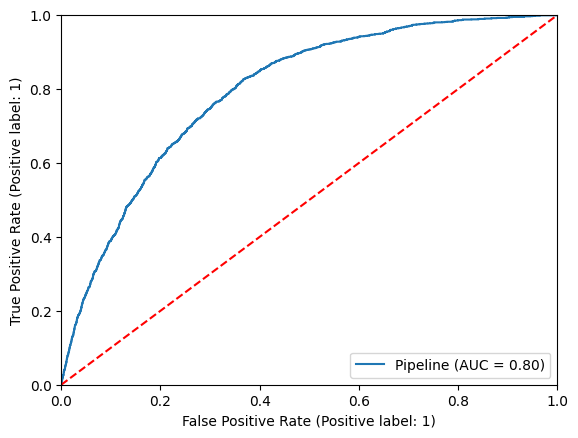

In [125]:
from sklearn.metrics import RocCurveDisplay
fitmodel = model_pipe.fit(x_train, y_train)
display = RocCurveDisplay.from_estimator(fitmodel, x_test, y_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
pass

<ul>
    <li>Mô hình tốt nhất được lựa chọn có ROC cong lồi về phía trên, mô hình phân loại tương đối tốt
    <li>AUC đạt 0.8 có thể xem ở các ngưỡng phân loại thì mô hình được coi là tốt

<center><h2>Kết luận<h2></center
    
 <ul>
    <li>Thuật toán XGBoost có performance tốt nhất với độ chính xác xấp xỉ 84,5%</li>
    <li>Mô hình sử dụng các thuật toán đơn giản để kiểm tra,do lượng biến tương đối nhỏ chưa dùng tới các kỹ thuật trong Deep learning hay Giảm chiều dữ liệu/Smote</li>
</ul>